# AST 502: Lecture 4: Maximum Likelihood Estimator

## Ragadeepika Pucha, Fall 2017, Chapter 4.1-4.4

A quick review of 
- Statistical Inference.
- The Likelihood Function.
- Maximum Likelihood Estimator.
- MLE Applied to Homoscedastic and Heteroscedastic Gaussians.
- The Goodness of Fit.
- Expectation Maximization Algorithm.

based on Ivezic book and UW Astr 324 Class.

# Statistical Inference -
## Drawing Conclusions from the data

There are three main types of inference -

- **Point Estimation:** Based on the available data, what is the best estimate of a parameter?
- **Confidence Estimation:** How confident are we about the point estimation?
- **Hypothesis Testing:** Are the data consistent with a given hypothesis or model?

# Frequentist VS Bayesian Inference -

### Frequentist -
- _Classical_ approach - Probabilities refer to the relative frequencies of events.
- Data varies
- Parameters are fixed.

### Bayesian -
- Probability is the degree of subjective belief.
- Depends on the set of initial conditions - known as _Priors_.
- Data is fixed.
- Inferences about the parameter are made by producing probability distributions of them. Estimates are then made based of these distributions.

Interested Further Reading - http://www.behind-the-enemy-lines.com/2008/01/are-you-bayesian-or-frequentist-or.html

# The Likelihood Function -

This is a quantitative measurement of our measuring process - Probability of _data_ given a _model_.

Assume a parent distribution $N (\mu, \sigma)$ from which our data $\{x_i\}$ are being drawn. The likelihood of a given value $x_i$ is just given by inputting the value in the probability distribution function. Assuming that the individual values are independent, the likelihood of the entire data (not just one measurement) is given by the likelihood function, $L$ - 

$$L = p(\{x_i\})|M(\theta)) = \prod_{i=1}^{n}p(x_i|M(\theta))$$

where $M(\theta)$ stands for our model and $\theta$ are the parameters for the model.

For example, for the Gaussian distribution probability of getting a specific value of $x$ is given by:
$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

### Note:
- Although L is the "Probability of the data given the model", it is not a true pdf - does not normalize to 1.
- It can be a function of both the data as well as the model.

# Maximum Likelihood Estimation (MLE)

This is relevant in both Bayesian and Frequentist approaches.

### Maximum Likelihood Approach
Maximum Likelihood estimation consists of the following steps:

1. **Hypothesis:** Fomulate a model, a _hypothesis_, about how the data is generated. The resulting inferences are strongly dependent of the quality of this assumption. Models are typically descibed using a set of parameters $\theta$, and written as $M(\theta)$.

2. **Maximum Likelihood Estimation:** Search for the best model parameters $\theta$ which maximizes the likelihood $L(\theta) = p(data|model)$. This search gives the MLE point estimates.

3. **Estimate Uncertainty:** Determine the confidence region for the model parameters. It can be done analytically with some approximations, or numerically for arbitraty models using general frequentist techniques, such as bootstrap, jackknife, and cross-validation.

4. **Hypothesis Testing:** Perform hypothesis tests as needed to make conclusions about the model and the point estimates.

## Example: Measuring the Position of a Quasar
_credits: UW ASTR324 Lectures_

Let's assume we want to estimate the position $x$ of a quasar from a series of individual astrometric measurements.

1. We adopt a model where the observed quasar does not move, and individual measurement errors are drawn from a normal distribution.

2. We derive the expression for the likelihood of there being a quasar at position $x_{0}$ that gives rise to our individual measurements. We find the value of $x'_{0}$ for which the likelihood is maximum.

3. Determine the error bars of our measurement.

4. We test whether what we've observed is consistent with our adopted model. 

## Back to the Likelihood Function

The likelihood function, $L$ is - 

$$L = p(\{x_i\})|M(\theta)) = \prod_{i=1}^{n}p(x_i|M(\theta))$$

If the parent distribution is considered to be gaussian, then this can be written as - 

$$L = \left( \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \right) \exp\left( -\frac{1}{2} \sum \left[\frac{(x_i-\mu)}{\sigma} \right]^2 \right)$$

The exponential part is just 

$$\exp \left(-\frac{\chi^2}{2}\right)$$ as,

$$\chi^2 = \sum_{i=1}^n \left ( \frac{x_i-\mu}{\sigma}\right)^2.$$

So, maximizing the likelihood is the same as minimizing $\chi^2$.

# Core Idea Behind Maximum Likelihood Estimators

Let's say that we know that some data were drawn from a Gaussian distribution, but we don't know the $\theta = (\mu, \sigma)$ values of that distribution. 

In such a case, the MLE tells us to think of the likelihood as a function of the unknown parameters that maximize the value of the function. Those will be our Maximum Likelihood Estimators for the true values of the model.


# MLE Applied to Homoscedastic Gaussian

This just means that all the measurements have the same error, say $\sigma$. If the measurements can have different errors, then its called _heteroscedastic_.

For an experiment with the set of measured positions $D = \{x_i\}$ in one dimension with Guassian errors, the likelihood function is:

$$L = p(\{x_i\})|M(\theta))= \left( \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \right) \exp\left( -\frac{1}{2} \sum \left[\frac{-(x_i-\mu)}{\sigma} \right]^2 \right)$$

If $\sigma$ is both constant and known, then there is only one parameter for the model, $\theta = \mu$.

Taking log on both sides - 

$$\ln L = constant - \frac{1}{2}\sum_{i=1}^{n} \left[\frac{(x_i-\mu)^2}{\sigma^2} \right] $$

If the estimate of $\mu$ is $\mu_{0}$ (say), then this can be found by maximizing the likelihood function.

$$\frac{d\;{\rm lnL}(\mu)}{d\mu}\Biggr\rvert_{\mu_{0}} \equiv 0$$

That gives $$ \sum_{i=1}^N \frac{(x_i - \mu_{0})}{\sigma^2} = 0$$

Since $\sigma$ is a constant, we get - 

$$\sum_{i=1}^N x_i = \sum_{i=1}^N \mu_{0} = N \mu_{0}$$

Thus we find that
$$\mu_{0} = \frac{1}{N}\sum_{i=1}^N x_i$$
which is just the arithmetic mean of all the measurements.

# Example

Assume a Gaussian distribution with $\mu$ = 5 and $\sigma$ = 1. Lets simulate 10 measurements and comupte the MLE of $\mu$.

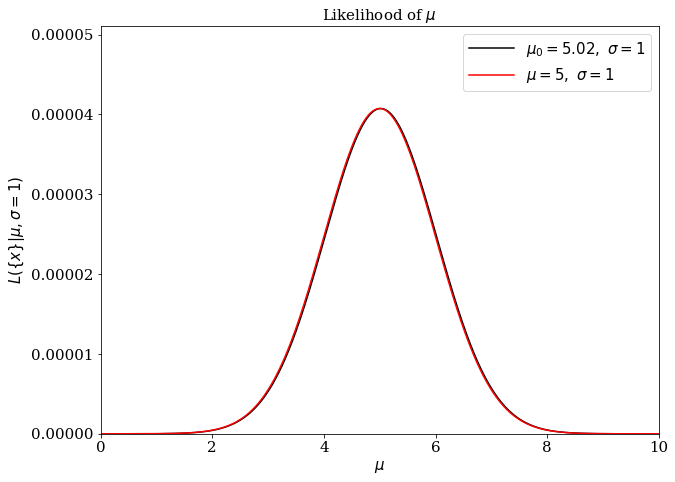

In [3]:
# Execute this cell
%matplotlib inline
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=False)

#------------------------------------------------------------
np.random.seed(seed=42)
Nsamples=1000                                                                # Make changes here
measurements = np.random.normal(5, 1, Nsamples)
mu = np.average(measurements)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(10, 7.5))
dist = norm(mu, 1)
dist_p = norm(5,1)
C = (1./(2.*np.pi))**(10./2.)
x = np.linspace(0, 10, 1000)
plt.plot(x, C* dist.pdf(x), c='black',label=r'$\mu_{0}=%.2f,\ \sigma=1$' % mu)
plt.plot(x, C* dist_p.pdf(x), c = 'red', label=r'$\mu = 5,\ \sigma = 1$')
#plt.axvline(x=5)

plt.xlim(0, 10)
plt.ylim(0, 0.5*C)

plt.xlabel('$\mu$')
plt.ylabel(r'$L(\{x\}|\mu,\sigma=1)$')
plt.title('Likelihood of $\mu$')

plt.legend()

# Quantifying Estimate Uncertainty

The uncertainty on the MLEs are obtained by the second (partial) derivatives of the log-likelihood:

$$\sigma_{jk} = \left( - \frac{d^2}{d\theta_j} \frac{\ln L}{d\theta_k} \Biggr\rvert_{\theta=\theta_{0}}\right)^{-1/2}$$

For our estimate of $\mu$,

$$\sigma_{\mu} = \left( - \frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\mu_{0}}\right)^{-1/2}$$

Solving - $$\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}.$$

So, our estimator of $\mu$ is $\mu_{0} \pm\frac{\sigma}{\sqrt{N}}$ is our result. In other words $(\mu_{0} - \sigma_{\mu}, \mu_{0} + \sigma_{\mu})$ gives us our confidence interval.

# MLE Applied to a Heteroscedastic Gaussian:

Now, we consider the measurements where the errors are different, but they are known. Since $\sigma_{i}$ are not constant the equation of log-likelihood will be - 

$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

Taking the derivative:
$$\frac{d\;{\rm \ln L}(\mu)}{d\mu}\Biggr\rvert_{\mu_{0}} = \sum_{i=1}^N \frac{(x_i - \mu_{0})}{\sigma_i^2} = 0$$

$$\sum_{i=1}^N \frac{x_i}{\sigma_i^2} = \sum_{i=1}^N \frac{\mu_{0}}{\sigma_i^2}$$

$$\mu_{0} = \frac{\sum_{i}^{N} (x_i/\sigma_i^2)}{\sum_{i}^N (1/\sigma_i^2)}$$

$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}$$

# Properties of the Maximum Likelihood Estimators:

The most important assumption while computing the estimators is that the data truly comes from the specified model class. 

MLEs have the following properties -

- They are consistent. As the number of data points increases, they converge to the true parameter.
- They are asymptotically normal estimators. The distribution of the parameter estimate approaches a normal distribution, center at the MLE, as the number of data points increases.
- They achieve the best possible error given the data at hand. No other estimator can do better in terms of efficiency using each data point to reduce the total error of the estimate. 

# The Goodness of Fit:

The MLE approach estimates the "best-fit" model parameter and gives their uncertainties, but it does not tell us how good the fit is. 

Using the best-fit paramters, we can compute the maximum value of the likelihood, say $L_{o}$. The goodness of fit can then be described as whether or not it is likely to have obtained $ln L_{o}$ by randomly drawing from the data. This means that the distribution of $ln L$ has to be known.

For the Gaussian case,

$$\ln L = constant - \frac{1}{2} \sum_{i=1}^{n} \left[\frac{(x_i-\mu)^2}{\sigma^2} \right] $$

If $z_{i} = (x_i - \mu)/ \sigma$, then $$\ln L = {\rm constant} - \frac{1}{2}\sum_{i=1}^N z_{i}^2 = {\rm constant} - \frac{1}{2}\chi^2$$ 

Thus, the distribution of $\ln L$ depends on the distribution of $\chi^2$ with $N-k$ degrees of freedom, where $k$ is the number of model parameters. 

The expectation value of the $\chi^2$ distribution is $N-k$ and its standard deviation is $\sqrt{2(N-k)}$.

For a good fit, we expect that $\chi^2$ per degree of freedom, $$\chi_{dof}^{2} = \frac{1}{N-k} \sum_{i=1}^N z_{i}^2 \approx 1$$

If $(\chi^2 - 1)$ is many times larger than $\sqrt{2/(N-k)}$, it is likely that we are not using the correct model. We can also get overly high or low values of $\chi_{dof}^2$, if our errors are under- or over-estimated.


# An Example:

Consider a case of the luminosity of a single star being measured multiple times. Our model is that of a star with no intrinsic luminosity variation. 

- If the model and measurement errors are consisten, $\chi_{dof}^2$ is close to 1.
- $\chi_{dof}^2$ much less than 1 indicates that the errors are overestimated, while underestimating the measurement errors can lead to a high value of $\chi_{dof}^2$. 
- $\chi_{dof}^2$ much larger than 1 can also indicate that our model is not a description of our data. For example, if the star has an intrinsic variation, then our model will clearly not match the data.

![Ivezic, Figure 4.1](http://www.astroml.org/_images/fig_chi2_eval_1.png)


# MLE Applied to Gaussian Mixtures: 

- Data likelihood can be a complex function of many parameters that often does not admist an easy solution. Numerical methods need to be applied.

- A special case of a fairly complex likelihood, but which can still be maximized using a relatively simple method is the case of Gaussian Mixtures.

## Gaussian Mixture Model

The likelihood of $x_i$ for a Gaussian mixture model is given by $$p(x_i|\theta) = \sum_{j=1}^{M} \alpha_{j} N(\mu_j, \sigma_{j})$$

where dependence on $x_i$ comes from a Guassian $N(\mu_j, \sigma_j)$. 

The parameters that need to be estimated for a given data now include the normalization factors for each Guassian, $\alpha_{j}$, and its parameters $\mu_{j}$ and $\sigma_{j}$. It is assumed that the data have negligible uncertainties and $M$ is given. 

Since the likelihood of a single $x_i$ is a true pdf, $$ \sum_{j=1}^{M} \alpha_{j} = 1 $$

The log-likelihood for the whole data set is - $$\ln L = \sum_{j=1}^{N} \ln \left[\sum_{j=1}^{M} \alpha_{j} N(\mu_{j}, \sigma_{j})\right] $$ and needs to be maximized as a function of $k = (3M - 1)$ parameters.



 ### Class Labels and Hidden Variables - 
 
If each of the $M$ Gaussian components are interpreted as different classes, then a particular $x_i$ was generated by one and only one of the individual Gaussian components, then the index $j$ is called as a _class label_. The _hidden variable_ here is the class label $j$ responsible for generating each $x_i$. 

If the class label for each $x$ is known, then the maximization problem is trivial. All the data could be sorted into $M$ subsamples according to their label. Since the class labels are not known, we can only determine the probability that a datum $x_i$ belongs to a class $j$.

$$ p(j|x_i) = \frac{\alpha_j N(\mu_j,\sigma_j)}{\sum_{j=1}^{M} \alpha_j N(\mu_j,\sigma_j)} \hspace{10pt} (By \hspace{3pt} Baye's \hspace{3pt} Rule)$$

# Expectation Maximixation Algorithm:

The EM algorithm can be used to make the maximization of the likelihood fast and straightforward in practice. The key ingredient of the iterative EM algorithm is the assumption that the class probability is known and fixed for each iteration.

The EM algorithm is not limited to Gaussian mixtures, so we can use a more generalized pdf for each component, say $p_j(x_i|\theta)$.

$$\ln L = \sum_{j=1}^{N} \ln \left[\sum_{j=1}^{M} \alpha_{j} p_j(x_i|\theta)\right] $$

Taking partial derivative of $\ln L$ w.r.t the parameter $\theta_j$:

$$ \frac{\partial \ln L}{\partial \theta_j} = \sum_{i=1}^{N} \frac{\alpha_j}{\sum_{j=1}^M \alpha_j p_j (x_i|\theta)} \left[\frac{\partial p_j(x_i|\theta)}{\partial \theta_j} \right] $$

This can be re-written as:

$$ \frac{\partial \ln L}{\partial \theta_j} = \sum_{i=1}^{N} \frac{\alpha_j p_j (x_i|\theta)}{\sum_{j=1}^M \alpha_j p_j (x_i|\theta)} \left[\frac{1}{p_j (x_i|\theta)} \frac{\partial p_j(x_i|\theta)}{\partial \theta_j} \right] = \sum_{i=1}^{N} p(j|x_i) \left[\frac{\partial ln \hspace{2pt} p_j(x_i|\theta)}{\partial \theta_j} \right]$$  

Since we are assuming that the class probability will remain fixed in a given iteration, introduce $p(j|x_i) = w_{ij}$. When $p_{j}(x_i|\theta)$ is Gaussian, then it leads to a particularly simple constraints for the model parameters.

$$ \frac{\partial ln L}{\partial \theta_j} = \sum_{i=1}^{N} w_{ij} \frac{\partial}{\partial \theta_j} \left[ln \sigma_j + \frac{(x_i - \mu_j)^2}{2 \sigma^2} \right] $$ where $\theta_j$ corresponds to $\mu_j$ or $\sigma_j$. By maximizing individually, we get the estimators.

$$ \mu_j = \frac{\sum_{i=1}^{N} w_{ij}x_{i}}{\sum_{i=1}{N} w_{ij}} $$

and

$$ \sigma_{j}^2 = \frac{\sum_{i=1}^{N} w_{ij} (x_i - \mu_j)^2}{\sum_{i=1}^{N} w_{ij}} $$

From the normalization constraint, 

$$ \alpha_{j} = \frac{1}{N} \sum_{i=1}^{N} w_{ij} $$

This is the beginning of the iteration.

- The algorithm is not sensitive to the initial guess of the parameter values. 
- The EM algorithm does converge.
- However, there are a few cases when the algorithm may fail due to numerical difficulties, like when the available data are sparsely distributed, in case of outliers, or if some data points are repeated.

In [29]:
import numpy as np
from sklearn.mixture import GMM
X = np.random.normal(size = (100, 1)) # 100 points in 1 dimension
model = GMM(2) # two components
model.fit(X)

model.means_  # the locations of the best fit components

/Users/ragadeepika.pucha/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ragadeepika.pucha/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ragadeepika.pucha/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ragadeepika.pucha/anaconda/lib/pytho

array([[-0.53709577],
       [ 0.52900088]])

![Ivezic, Figure 4.1](http://www.astroml.org/_images/fig_GMM_1D_1.png)

- Example of a one-dimensional Gaussian Mixture Model with three components. 
- Left Panel: Histogram of the data, along with the best-fit model for a mixture of three components.
- Center Panel: Model Selection Criteria - AIC and BIC (Section 4.3.2).
- Right Panel - Probability that a given point is drawn from each class as a function of its position. 

### Assumptions used in the EM algorithm -

- The number of classes, M, is known.
- The measurement erros for $\{x_i\}$ are negligible compared to the smallest component width, $\sigma_j$.
- The mixture models are Gaussian.

The EM algorithm can be extended to not include these assumptions. Further explanation - Section 4.4.3.

# Next Steps:

- Confidence Intervals - Bootstrap and Jackknife (Section 4.5).
- Hypothesis Testing (Section 4.6).